**We can apply machine learning model by following six steps:-**
- Problem Definition
- Analyse Data
- Prepare Data
- Evaluate Algorithm
- Improve Results
- Present Results

**Factors help to choose algorithm**
- Type of algorithm
- Parametrization
- Memory size
- Overfitting tendency
- Time of learning
- Time of predicting

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
train = pd.read_csv("../input/random-linear-regression/train.csv") 
test = pd.read_csv("../input/random-linear-regression/test.csv") 
train = train.dropna()
test = test.dropna()
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


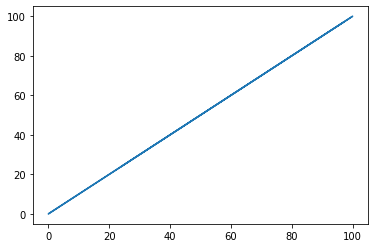

0.9888014444327563


In [2]:
def LinReg(train,test):
    
    xtrain = np.array(train.iloc[:,:-1])
    ytrain = np.array(train.iloc[:,1])
    xtest  = np.array(test.iloc[:,:-1])
    ytest  = np.array(test.iloc[:,1])
    
    model = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
    
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    accuracy = model.score(xtest,ytest)
    
    return ypred,model,accuracy,xtrain 

ypred,model,accuracy,xtrain  = LinReg(train,test)

plt.plot(xtrain,model.predict(xtrain))
plt.show()
print(accuracy)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def LogReg(data_file):
    # Load the data
    train = pd.read_csv(data_file)

    # Preprocessing
    ports = pd.get_dummies(train['Embarked'], prefix='Embarked')
    train = train.join(ports)
    train.drop(['Embarked'], axis=1, inplace=True)
    
    train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
    y = train['Survived'].copy()
    X = train.drop(['Survived'], axis=1)
    X.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
    X['Age'].fillna(X['Age'].median(), inplace=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

    # Train the Logistic Regression model
    model = LogisticRegression(max_iter=500000)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)
    return accuracy

if __name__ == "__main__":
    data_file = "../input/titanic/train.csv"
    accuracy = LogReg(data_file)
    print(f"Accuracy: {accuracy}")

Accuracy: 0.8251121076233184


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

data_svm = pd.read_csv("../input/svm-classification/UniversalBank.csv")
data_svm.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
def SVM(data, kernel='rbf', random_state=0, cv=10):
    X = data.iloc[:, 1:13].values
    y = data.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    classifier = SVC(kernel=kernel, random_state=random_state)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=cv)
    mean_accuracy = accuracies.mean()

    return mean_accuracy

if __name__ == "__main__":
    data_svm = pd.read_csv("../input/svm-classification/UniversalBank.csv")
    kernel = 'rbf'  # Change the kernel if needed
    random_state = 0  # Change the random state if needed
    cv = 10  # Change the number of cross-validation folds if needed

    mean_accuracy = SVM(data_svm, kernel, random_state, cv)
    print(f"Mean Accuracy: {mean_accuracy}")

Mean Accuracy: 0.7077333333333333


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
data = pd.read_csv('../input/classification-suv-dataset/Social_Network_Ads.csv')
data_nb = data
data_nb.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
def naive_bayes(data, feature_cols, target_col, test_size=0.2, random_state=0):
    # Split the data into features (X) and the target variable (y)
    X = data_nb.iloc[:, [2,3]].values
    y = data_nb.iloc[:, 4].values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize the features
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Create a Gaussian Naive Bayes classifier
    classifier = GaussianNB()
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Example usage:
# Assuming your data is stored in a DataFrame named 'data_nb'
feature_columns = [2, 3]  # Replace with the actual column indices or column names
target_column = 4  # Replace with the actual column index or column name

accuracy = naive_bayes(data_nb, feature_columns, target_column)
print("Accuracy:", accuracy)


Accuracy: 0.9125


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = pd.read_csv("../input/iris/Iris.csv")
knn.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
def KNN(data, feature_cols, target_col, n_neighbors=5, test_size=0.2, random_state=0):
    # Split the data into features (X) and the target variable (y)
    X = knn.iloc[:, [1,2,3,4]].values
    y = knn.iloc[:, 5].values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize the features
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Create a K-Nearest Neighbors classifier
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski', p=2)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Example usage:
# Assuming your data is stored in a DataFrame named 'knn'
feature_columns = [1, 2, 3, 4]  
target_column = 5  

accuracy = KNN(knn, feature_columns, target_column, n_neighbors=5)
print("Accuracy:", accuracy)

Accuracy: 1.0
